In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## 1. Loading and Preprocessing

In [45]:
from sklearn.datasets import load_iris

In [47]:
data=load_iris()

In [49]:
x=data.data
y=data.target
feature=data.feature_names

In [51]:
df=pd.DataFrame(x,columns=feature)
df['target']=y

In [53]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [57]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [59]:
#description about data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [61]:
#checking for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [63]:
#checking for duplicates
df.duplicated().sum()

1

In [65]:
#removing duplicate
df.drop_duplicates(inplace=True)

In [67]:
df.duplicated().sum()

0

#### Drop the species column since this is a clustering problem.

Here species is classified in target column, So it is removing. As clustering is an unsupervised model there is no need of target column.

In [70]:
df.drop(columns = 'target',inplace = True)

In [72]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
#checking correlation
correlation=df.corr()
correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


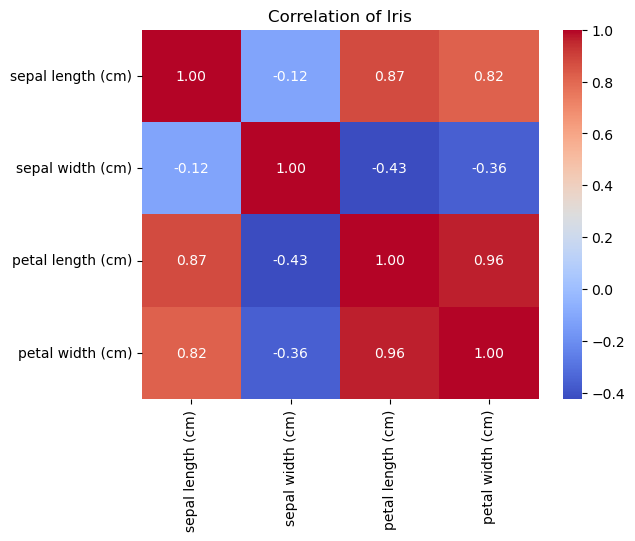

In [78]:
# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Iris")
plt.show()

In [80]:
num_columns = df.select_dtypes(include = 'number')

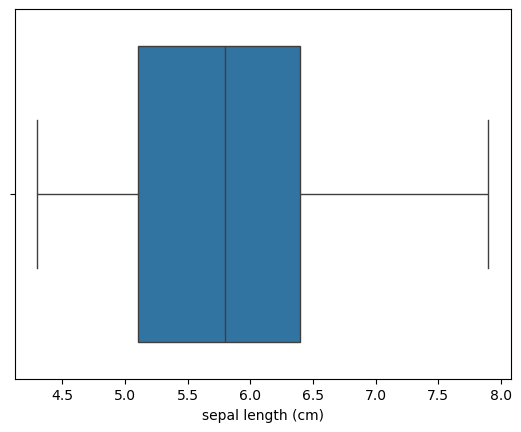

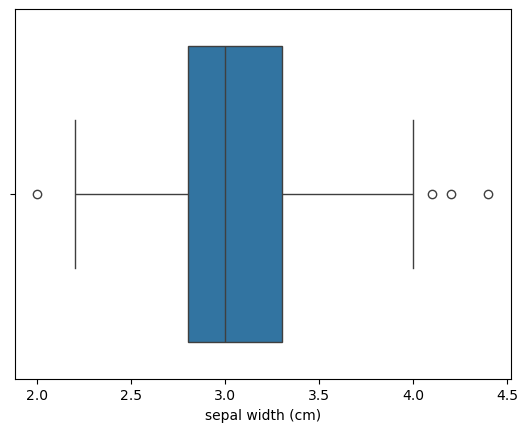

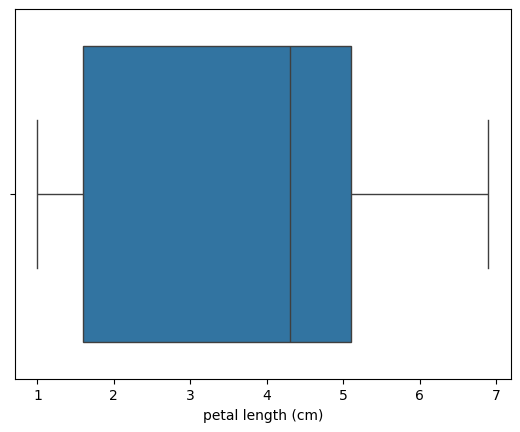

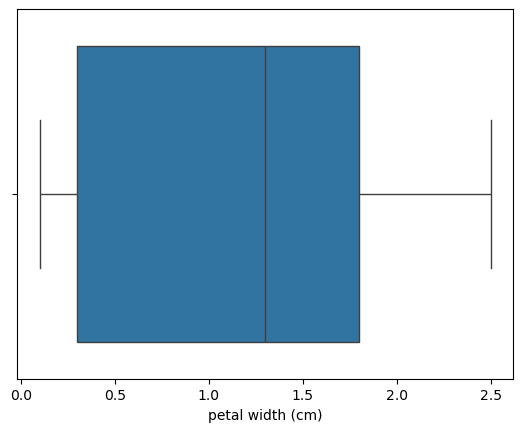

In [81]:
for i in num_columns.columns:
    sns.boxplot(data = df, x = i)
    plt.show()

In [84]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [86]:
df1 = outliers(df)

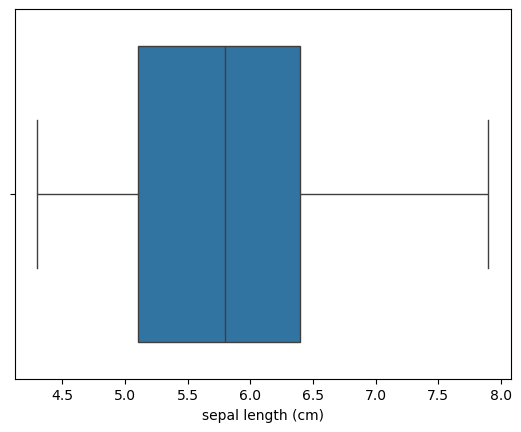

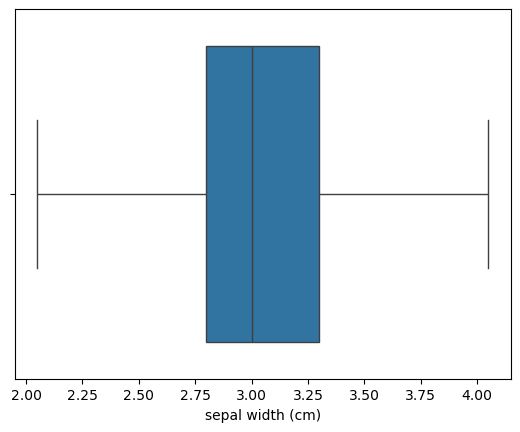

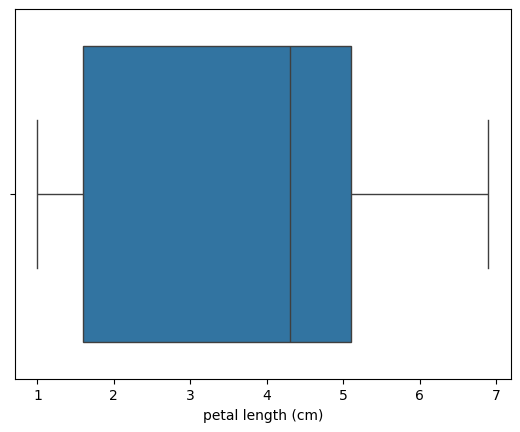

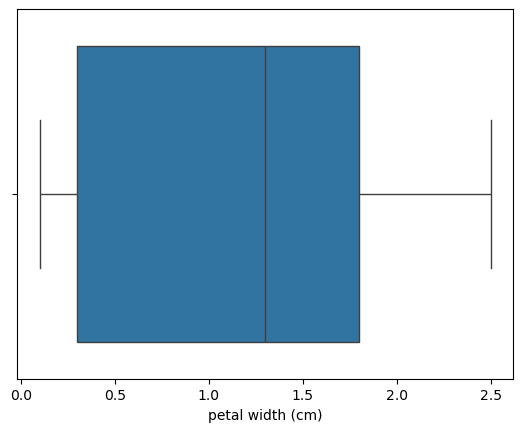

In [88]:
for i in num_columns.columns:
    sns.boxplot(data = df1, x = i)
    plt.show()

In [90]:
#checking Skewness
df1.skew()

sepal length (cm)    0.312826
sepal width (cm)     0.182187
petal length (cm)   -0.263101
petal width (cm)    -0.090076
dtype: float64

In [92]:
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns

In [94]:
df2 = df1[numerical_features]

In [98]:
correlation = df2.corr()
correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.119293,0.873738,0.820620
sepal width (cm),-0.119293,1.000000,-0.425425,-0.362030
petal length (cm),0.873738,-0.425425,1.000000,0.962772
petal width (cm),0.820620,-0.362030,0.962772,1.000000


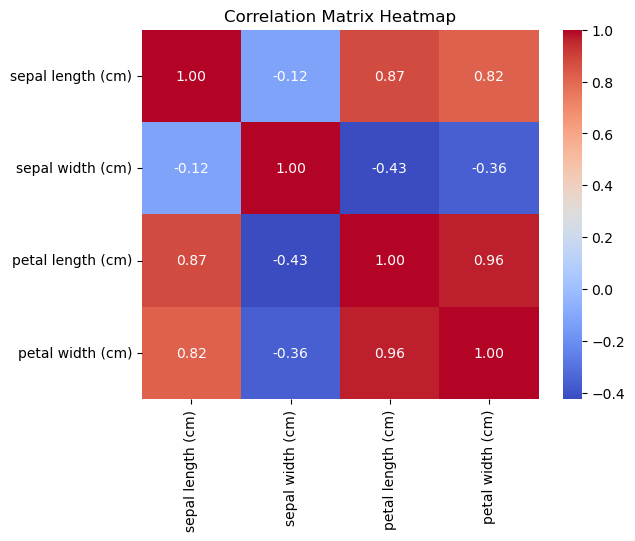

In [100]:
# Plotting the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## 2.Clustering Algorithm Implementation

### a) K-Means Clusterting

K-means clustering is an unsupervised machine learning algorithm used to group similar data points into clusters. It works by selecting k initial cluster centers (centroids), then assigning each data point to the nearest centroid. The centroids are updated iteratively by computing the mean of the assigned points, and the process repeats until the clusters stabilize. K-means is widely used in pattern recognition, market segmentation, and image compression. However, it requires choosing the number of clusters in advance and can be sensitive to the initial placement of centroids.

In [108]:
X = df2

In [110]:
dfc=df1.copy()

In [116]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(dfc)
X=pd.DataFrame(x_scaled)

In [118]:
X.head()

,0,1,2,3
0,-0.898033,1.045312,-1.333255,-1.308624
1,-1.139562,-0.132838,-1.333255,-1.308624
2,-1.381091,0.338422,-1.390014,-1.308624
3,-1.501855,0.102792,-1.276496,-1.308624
4,-1.018798,1.280942,-1.333255,-1.308624


In [120]:
#Elbow Method

sse = []  #WCSS  - sum of squares
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

#### Elbow Method

The elbow method is a technique used to determine the optimal number of clusters (k) in K-means clustering. It works by plotting the within-cluster sum of squares (WCSS) against different values of k. WCSS measures the total variance within clusters, and it typically decreases as k increases.

The key idea is to find a point where the rate of decrease slows down, forming an "elbow" in the plot. This elbow point represents the optimal number of clusters, balancing compact clusters while avoiding overfitting. If no clear elbow is visible, other techniques like the Silhouette Score can be used

Text(0.5, 1.0, 'Elbow Method')

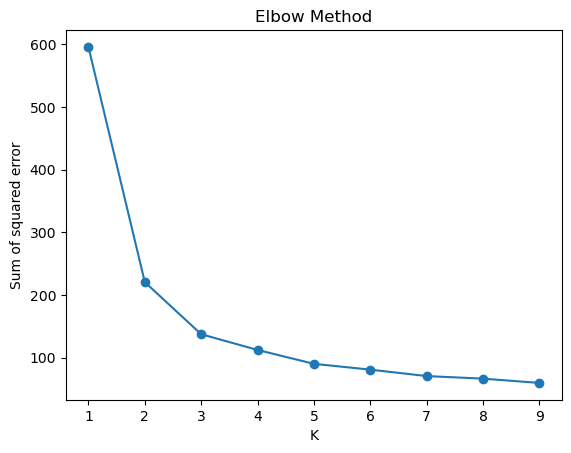

In [123]:
plt.plot(k_range,sse,marker='o')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method')

In [127]:
k=5
kmeans=KMeans(n_clusters=5,random_state=42)
X['Cluster']=kmeans.fit_predict(X)
X.head()

,0,1,2,3,Cluster
0,-0.898033,1.045312,-1.333255,-1.308624,1
1,-1.139562,-0.132838,-1.333255,-1.308624,1
2,-1.381091,0.338422,-1.390014,-1.308624,1
3,-1.501855,0.102792,-1.276496,-1.308624,1
4,-1.018798,1.280942,-1.333255,-1.308624,2


In [133]:
# Assuming `X` is your DataFrame or scaled data
if isinstance(X, pd.DataFrame):
    X.columns = X.columns.astype(str)  # Ensure column names are strings

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
print(pca_df.head())

        PC1       PC2
0 -2.374493 -0.951298
1 -2.402952 -0.039455
2 -2.574296 -0.427852
3 -2.561216 -0.215163
4 -1.848186 -1.645099


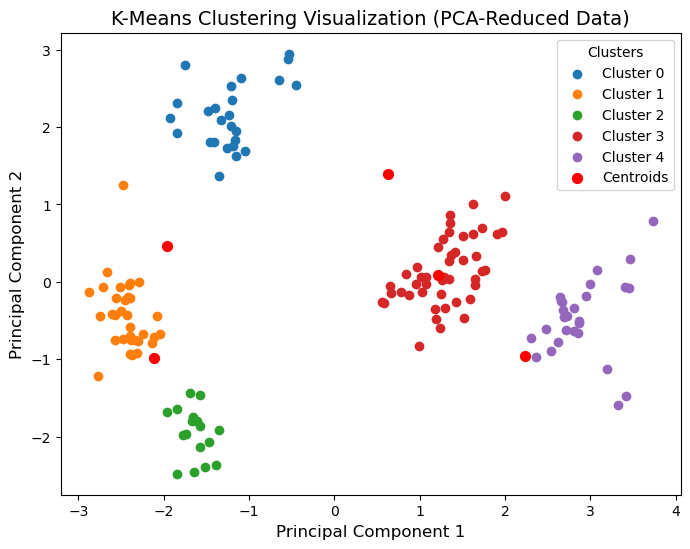

In [135]:
# Assuming `pca_df` is your DataFrame containing PC1, PC2, and cluster labels
pca_df['Cluster'] = X['Cluster']  # Add cluster labels to pca_df

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df['Cluster'].unique()):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

# Adding cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_pca = PCA(n_components=2).fit_transform(cluster_centers)  # Transform cluster centers using PCA
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], 
            c='red', marker='o', s=50, label='Centroids')

# Customizing the plot
plt.title('K-Means Clustering Visualization (PCA-Reduced Data)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Clusters')
plt.show()


### b)Hierarchical Clustering

Hierarchical clustering is a method of grouping similar data points into a hierarchy of clusters. It builds a tree-like structure called a dendrogram to show how clusters are formed. There are two types: Agglomerative (bottom-up), where each data point starts as its own cluster and gradually merges with others, and Divisive (top-down), where all data points start in one large cluster and are split into smaller groups. Unlike K-means clustering, hierarchical clustering does not require specifying the number of clusters beforehand. It is useful for visualizing relationships in data but can be slow for large datasets

In [138]:
dfc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [140]:
#  Create a linkage matrix using scipy's linkage function
Z = linkage(dfc, method='ward')  # 'ward' minimizes variance within clusters

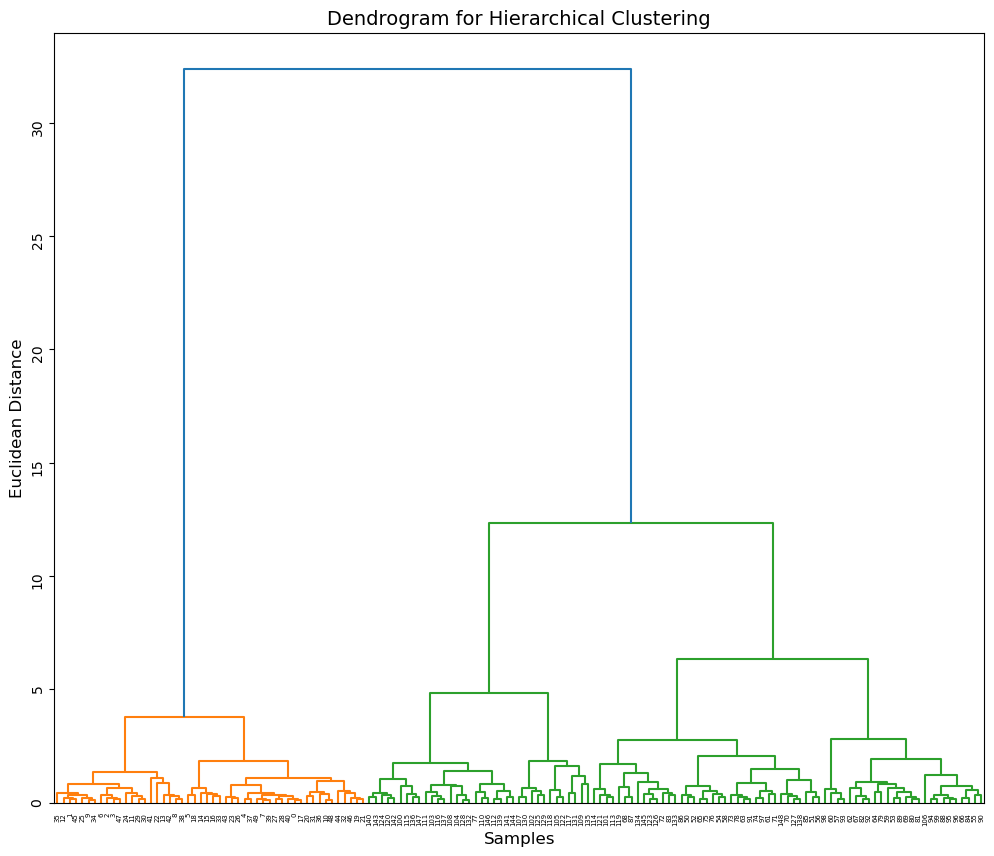

In [142]:
#Plot the dendrogram to visualize the hierarchy
plt.figure(figsize=(12, 10))
dend = shc.dendrogram(shc.linkage (dfc, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering', fontsize=14)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.yticks(rotation=90)
plt.show()

In [144]:
uniquecolors = set(dend["color_list"])
uniquecolors

{'C0', 'C1', 'C2'}

In [146]:
optimal_number_of_clusters = len(uniquecolors)-1
optimal_number_of_clusters

2

In [148]:
clusters = AgglomerativeClustering(n_clusters = optimal_number_of_clusters, metric="euclidean", linkage="ward")
clusters.fit_predict(dfc)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [150]:
dfc['cluster']=clusters.fit_predict(dfc)
dfc

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


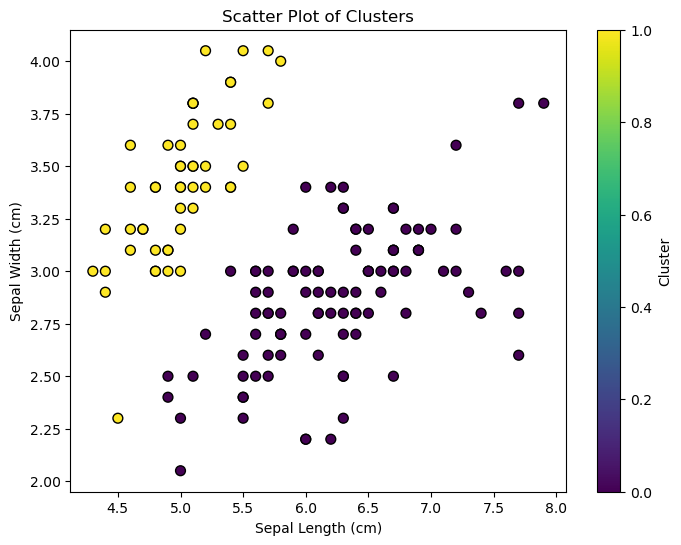

In [152]:
#Using agglomerative clustering

# Extracting features and clusters
x = dfc['sepal length (cm)']  # Choose one feature for x-axis
y = dfc['sepal width (cm)']   # Choose another feature for y-axis
clusters = dfc['cluster']     # Cluster assignments

# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=clusters, cmap='viridis', s=50, edgecolor='k')

# Adding labels and title
plt.title('Scatter Plot of Clusters')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(scatter, label='Cluster')  # Add colorbar to show cluster mapping
plt.show()